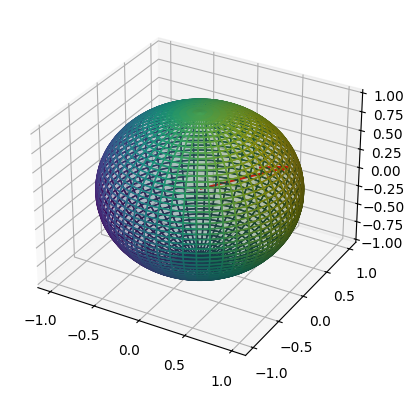

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# plot a sphere
phi = np.linspace(0, 2 * np.pi, 100)
theta = np.linspace(0, np.pi, 100)

x = np.outer(np.cos(phi), np.sin(theta))
y = np.outer(np.sin(phi), np.sin(theta))
z = np.outer(np.ones(np.size(phi)), np.cos(theta))

# the reward is maximized in a specific random direction.
# points close on the direction get a higher reward.
np.random.seed(0)
direction = np.random.randn(3)
direction = direction / np.linalg.norm(direction)
X = np.array([x, y, z])
reward = np.einsum('ikj,i->kj', X, direction)

# plot the reward as the color of the sphere
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, facecolors=plt.cm.viridis((reward - reward.min()) / (reward.max() - reward.min())), alpha=0.2)
ax.quiver(0, 0, 0, direction[0], direction[1], direction[2], color='r')
plt.show()

## Optimizing the vector

We start with a random vector and optimize it to maximize the reward. One way to stay on the hypersphere is to use projected gradient descent. However, here we will use implicit differentiation to find the gradient direction that stays on the hypersphere. Assume the reward is just the dot squared distance to the direction $\mathbf{v}$. To simplify the problem, we set the reward to be the dot product.

$$
r = \langle \mathbf{x}, \mathbf{v} \rangle
$$

The condition to stay on the hypersphere can be written as:
$$
\langle \mathbf{x}, \mathbf{x} \rangle = 1
$$

In differential form, this is:

$$
d\langle \mathbf{x}, \mathbf{x} \rangle = 2 \langle \mathbf{x}, d\mathbf{x} \rangle = 0
$$

The differential of the reward is:
$$
dr = \langle d\mathbf{x}, \mathbf{v} ⟩ + \langle \mathbf{x}, d\mathbf{v} ⟩
$$
